In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

Let's explore this airline datset:

In [2]:
df = pd.read_csv('data/airlines.csv')
df.head()

,Airline,Mishandled baggage (per 1000 passengers),Percentage On Time Arrivals
0,American West,4.36,81.9
1,United,4.00,80.9
2,Southwest,4.42,78.4
3,US Airways,7.16,78.3
4,Continental,4.62,75.7


View the scatterplot:

Text(0, 0.5, 'Percentage On Time Arrivals')

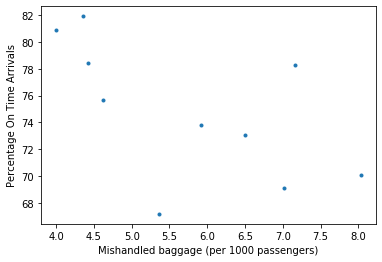

In [3]:
X = df['Mishandled baggage (per 1000 passengers)']
Y = df['Percentage On Time Arrivals']
plt.plot(X, Y, '.')
plt.xlabel('Mishandled baggage (per 1000 passengers)')
plt.ylabel('Percentage On Time Arrivals')

Let's run a linear regression model:

In [4]:
# Create an empty model
model = LinearRegression()
# Choose the response variable, which in this case is y
y = df['Percentage On Time Arrivals']
# Choose the predictor variable, which in this case is X:
X = df.drop(['Airline', 'Percentage On Time Arrivals'], axis=1)
# Fit the model to the full dataset
model.fit(X, y)
# print out intercept
print('b: ', model.intercept_)
# print out other coefficients
print('m: ', model.coef_)

b:  87.20288782505382
m:  [-2.15244604]


Watch these videos by Andrew Ng on Gradient Descent.

https://www.coursera.org/learn/machine-learning/lecture/8SpIM/gradient-descent

https://www.coursera.org/learn/machine-learning/lecture/GFFPB/gradient-descent-intuition


Finally, watch the following video, paying special attention to the formulas explained between 0:00 and 4:30:

https://www.coursera.org/lecture/machine-learning/gradient-descent-for-linear-regression-kCvQc

<img src="images/gradient1.png" width=500>
<img src="images/gradient2.png" width=500>
<img src="images/simultaneous.png" width=700>

### Exercise: Gradient Descent
Write a function called gradient_descent that takes in an input array, X, and output array, Y, a learning rate, alpha, and a tolerance, tol, and prints the $\theta_0$ and $\theta_1$ values obtained by the algorithm above. 


For example, if
```
X = df['Mishandled baggage (per 1000 passengers)']
Y = df['Percentage On Time Arrivals']
```
then 
```gradient_descent(X,Y,0.05,0.0001)```
should give us out something close (but not exactly) to the values we found above:

b (theta0) = 87.20288782505382 and m (theta1) = -2.15244604.


Hint: you may want to use an outer while loop that deals with the tolerance and updates the $\theta_0$ and $\theta_1$ values and an inner for loop that updates the $\frac{\partial}{\partial \theta_0}J(\theta_0, \theta_1)$ and $\frac{\partial}{\partial \theta_1}J(\theta_0, \theta_1)$ values.

In [5]:
#Normal Gradient Descent

y = df['Percentage On Time Arrivals']
X = df['Mishandled baggage (per 1000 passengers)']

def f(x,m,b):                                                         #Defining the function of f
     return m*x + b                                                   #Setting the function that is being defined

k = len(X)                                                            #Defines the number of values in the X data set
def gradient(X, y, alpha, tol):
    temp1, temp0 = 1,1                                                #Temporary Variables
    theta1, theta0 = 0,0                                              #Initial guesses for m and b 

    while ((temp0 - theta0)**2 + (temp1 - theta1)**2)**(1/2) > tol:   #Ensures that the loop is defined within the tolerance value 
        temp1, temp0 = theta1, theta0                                 #Keeps track of what is old and what is updated
        deriv0, deriv1 = 0, 0                                         #Resets the for loop
        
        for i in range(k):                                            #Inner Loop - Runs through k amount of times and spits the output into the while loop
            deriv1 += ((f(X[i], theta1, theta0) - y[i])) * X[i]
            deriv0 += (f(X[i], theta1, theta0) - y[i])
            
        theta1 = theta1 - (alpha * deriv1)/k
        theta0 = theta0 - (alpha * deriv0)/k
    print(theta0, theta1)
        
gradient(X, y, 0.05,0.0001)

87.16301264227455 -2.1458406529174456


In [6]:
#Summation of Gradient Descent into one cell!

y      = df['Percentage On Time Arrivals']                            #Imports the datasets...
X      = df['Mishandled baggage (per 1000 passengers)']
k      = len(X)                                                       #Defines the number of values in the X data set


fuct   = input('Stochastic or Normal? ')                              #Input of whether the user wants stochastic or normal

temp1  = 1                                                            #Definining initializing conditions for the while loop to start
temp0  = 1                                                        
count  = 0

def f(x,m,b):                                                         #Defining the function of f
     return m*x + b                                                   #Setting the function that is being defined

    
if fuct == "Normal" or fuct == "normal":    
    theta1 = float(input('What is your guess for m? '))               #Inputs for the function...
    theta0 = float(input('What is your guess for b? '))               
    alpha  = float(input('What is the alpha? '))
    tol    = float(input('What is the tolerance? '))

    while ((temp0 - theta0)**2 + (temp1 - theta1)**2)**(1/2) > tol:   #Ensures that the loop is defined within the tolerance value 
        temp1, temp0 = theta1, theta0                                 #Keeps track of what is old and what is updated

        deriv0, deriv1 = 0, 0                                         #Resets the for loop

        for i in range(k):                                            #Inner Loop - Runs through k amount of times and spits the output into the while loop
            deriv1 += ((f(X[i], theta1, theta0) - y[i])) * X[i]       #This loop is a summation loop 
            deriv0 += (f(X[i], theta1, theta0) - y[i])          

        theta1 -= (alpha * deriv1)/k                                  #This changes the slope and y-intercept of the hypothesis function to re-enter the while loop        
        theta0 -= (alpha * deriv0)/k

        count += 1
        if count % 100 ==0:
            plt.plot(theta0, theta1, '.')
            plt.xlabel('Theta0: B')
            plt.ylabel('Theta1: M')

    
    print('b:', theta0, 'm:', theta1) 

else:                                                                 #Stochastic Algorithim
    theta1 = float(input('What is your guess for m? '))               #Initial Guesses for m and b... 
    theta0 = float(input('What is your guess for b? '))   
    alpha = 0.01
    tol = 0.00001

    while ((temp0 - theta0)**2 + (temp1 - theta1)**2)**(1/2) > tol:
        temp1, temp0 = theta1, theta0                                 #Keeps track of what is old and what is updated
        deriv0, deriv1 = 0, 0                                         #Resets the for loop

        m = random.randint(0, len(X)-1)          
        deriv1 = ((f(X[m], theta1, theta0) - y[m])) * X[m]
        deriv0 = (f(X[m], theta1, theta0) - y[m])

        theta1 = theta1 - (alpha * deriv1)
        theta0 = theta0 - (alpha * deriv0)

        count += 1
        if count % 100 == 0:
            plt.plot(theta0, theta1, '.')
            plt.xlabel('Theta0: B')
            plt.ylabel('Theta1: M')

    print(theta1, theta0)

KeyboardInterrupt: 

In [9]:
X

0    4.36
1    4.00
2    4.42
3    7.16
4    4.62
5    5.92
6    6.50
7    8.03
8    7.02
9    5.36
Name: Mishandled baggage (per 1000 passengers), dtype: float64

In [10]:
df

,Airline,Mishandled baggage (per 1000 passengers),Percentage On Time Arrivals
0,American West,4.36,81.9
1,United,4.00,80.9
2,Southwest,4.42,78.4
3,US Airways,7.16,78.3
4,Continental,4.62,75.7
5,Jet Blue,5.92,73.8
6,American,6.50,73.1
7,Delta,8.03,70.1
8,Alaska,7.02,69.1
9,Northwest,5.36,67.2


In [11]:
x = df["Mishandled baggage (per 1000 passengers)"]

0    4.36
1    4.00
2    4.42
3    7.16
4    4.62
5    5.92
6    6.50
7    8.03
8    7.02
9    5.36
Name: Mishandled baggage (per 1000 passengers), dtype: float64

7.38905609893065